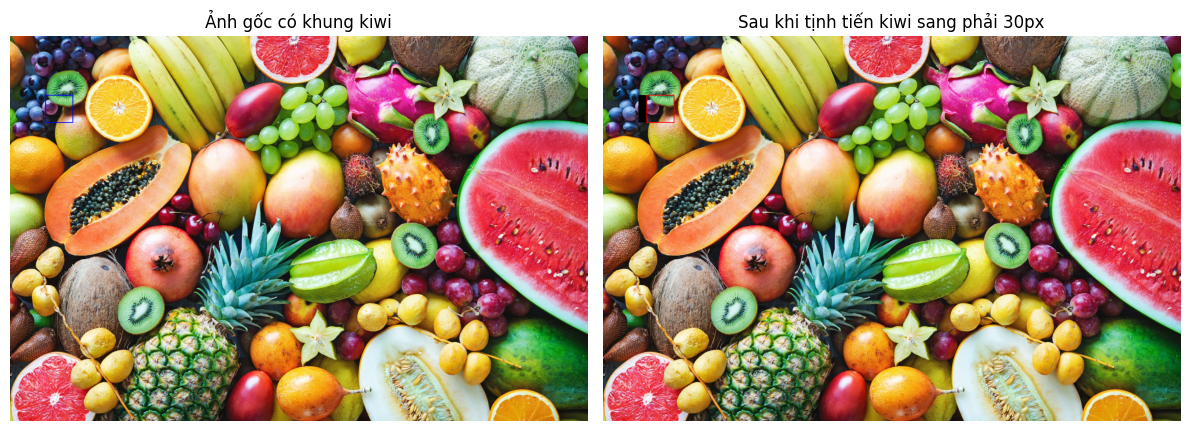

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('img/colorful-ripe-tropical-fruits.jpg')
if img is None:
    print("Không đọc được ảnh.")
    exit()

x, y, w, h = 130, 220, 100, 100
kiwi = img[y:y+h, x:x+w].copy()

img_no_kiwi = img.copy()
img_no_kiwi[y:y+h, x:x+w] = 0

new_x = x + 30
img_no_kiwi[y:y+h, new_x:new_x+w] = kiwi

cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
cv2.rectangle(img_no_kiwi, (new_x, y), (new_x+w, y+h), (0, 0, 255), 2)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title('Ảnh gốc có khung kiwi')
axs[0].axis('off')

axs[1].imshow(cv2.cvtColor(img_no_kiwi, cv2.COLOR_BGR2RGB))
axs[1].set_title('Sau khi tịnh tiến kiwi sang phải 30px')
axs[1].axis('off')

plt.tight_layout()
plt.show()

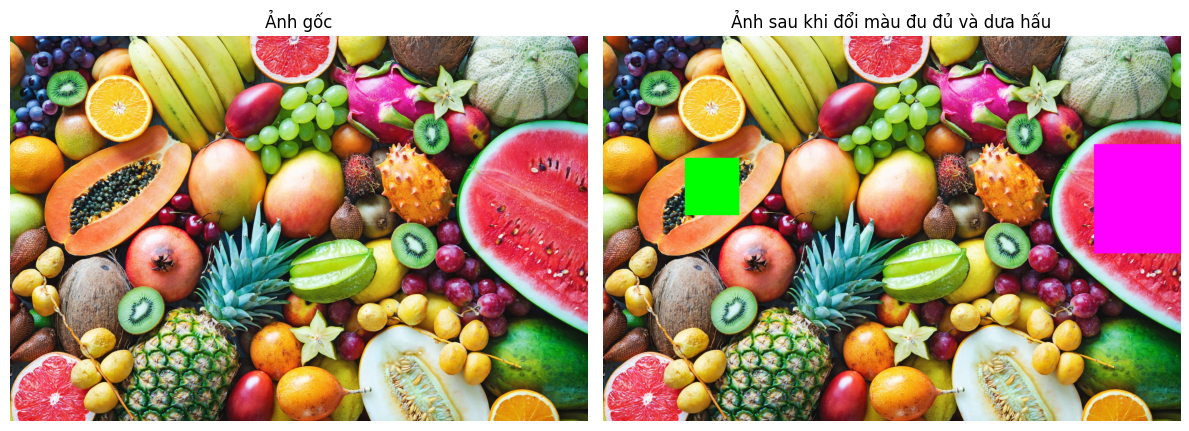

In [2]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('img/colorful-ripe-tropical-fruits.jpg')
if img is None:
    print("Không đọc được ảnh.")
    exit()

x1, y1, w1, h1 = 300, 450, 200, 210
x2, y2, w2, h2 = 1800, 400, 600, 400

img_edit = img.copy()

img_edit[y1:y1+h1, x1:x1+w1] = [0, 255, 0]     
img_edit[y2:y2+h2, x2:x2+w2] = [255, 0, 255]   

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title('Ảnh gốc')
axs[0].axis('off')

axs[1].imshow(cv2.cvtColor(img_edit, cv2.COLOR_BGR2RGB))
axs[1].set_title('Ảnh sau khi đổi màu đu đủ và dưa hấu')
axs[1].axis('off')

plt.tight_layout()
plt.show()


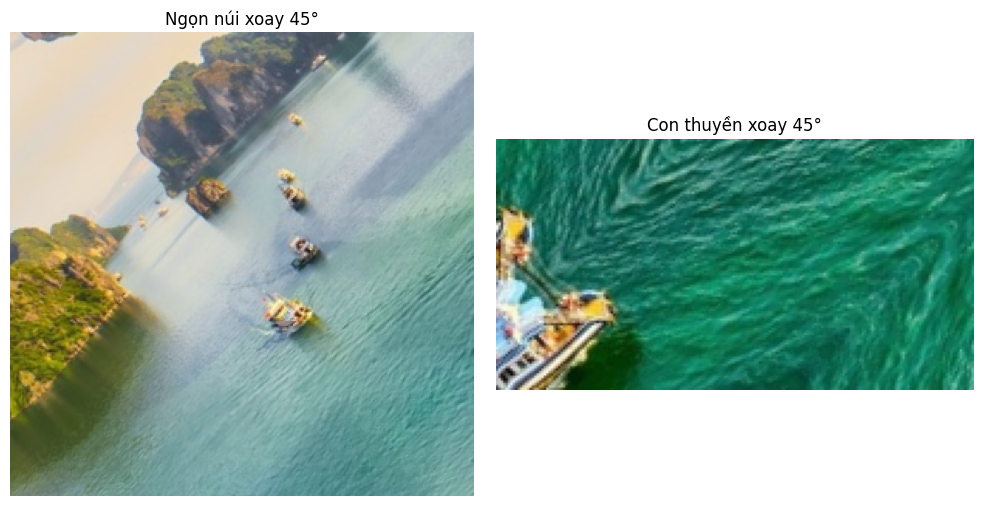

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('img/quang_ninh.jpg')
if img is None:
    print("Không đọc được ảnh.")
    exit()

mountain_coords = (100, 100, 300, 300)  # (x, y, w, h)
boat_coords = (600, 500, 200, 150)

def rotate_image(image, angle):
    h, w = image.shape[:2]
    center = (w // 2, h // 2)
    rot_mat = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(image, rot_mat, (w, h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT)

x1, y1, w1, h1 = mountain_coords
x2, y2, w2, h2 = boat_coords

mountain = img[y1:y1+h1, x1:x1+w1]
boat = img[y2:y2+h2, x2:x2+w2]

mountain_rotated = rotate_image(mountain, 45)
boat_rotated = rotate_image(boat, 45)

cv2.imwrite('mountain_rotated.jpg', mountain_rotated)
cv2.imwrite('boat_rotated.jpg', boat_rotated)

# Hiển thị ảnh sau khi xoay
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(cv2.cvtColor(mountain_rotated, cv2.COLOR_BGR2RGB))
axs[0].set_title('Ngọn núi xoay 45°')
axs[0].axis('off')

axs[1].imshow(cv2.cvtColor(boat_rotated, cv2.COLOR_BGR2RGB))
axs[1].set_title('Con thuyền xoay 45°')
axs[1].axis('off')

plt.tight_layout()
plt.show()


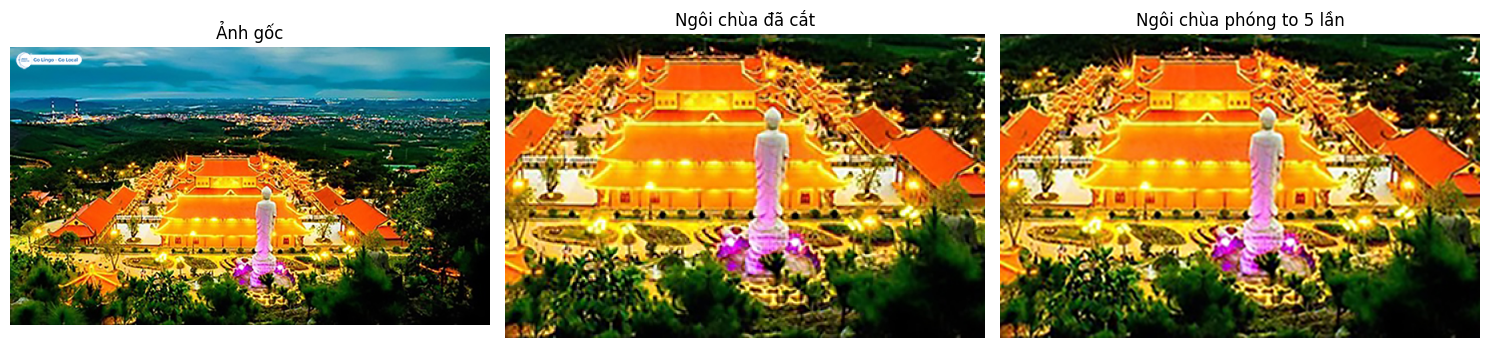

In [4]:
import cv2
import matplotlib.pyplot as plt

# Đọc ảnh gốc
img = cv2.imread('img/pagoda.jpg')
if img is None:
    print("Không đọc được ảnh.")
    exit()

# Ước lượng vùng chứa ngôi chùa chính giữa ảnh
x, y, w, h = 120, 120, 360, 260
pagoda = img[y:y+h, x:x+w]

# Phóng to 5 lần
pagoda_scaled = cv2.resize(pagoda, None, fx=5.0, fy=5.0, interpolation=cv2.INTER_CUBIC)

# Lưu ảnh đã phóng to
cv2.imwrite('pagoda_scaled_5x.jpg', pagoda_scaled)

# Hiển thị ảnh
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title('Ảnh gốc')
axs[0].axis('off')

axs[1].imshow(cv2.cvtColor(pagoda, cv2.COLOR_BGR2RGB))
axs[1].set_title('Ngôi chùa đã cắt')
axs[1].axis('off')

axs[2].imshow(cv2.cvtColor(pagoda_scaled, cv2.COLOR_BGR2RGB))
axs[2].set_title('Ngôi chùa phóng to 5 lần')
axs[2].axis('off')

plt.tight_layout()
plt.show()


In [5]:
import cv2
import numpy as np
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

# Dictionary ánh xạ tên ảnh
image_options = {
    "Trái cây": "img/colorful-ripe-tropical-fruits.jpg",
    "Quảng Ninh": "img/quang_ninh.jpg",
    "Ngôi chùa": "img/pagoda.jpg"
}

# Dictionary ánh xạ mã thao tác sang tiếng Việt
action_labels = {
    'T': 'tịnh tiến',
    'X': 'xoay',
    'P': 'phóng to',
    'H': 'thu nhỏ',
    'C': 'hiển thị tọa độ'
}

# Hàm xử lý ảnh
def load_image(path):
    img = cv2.imread(path)
    if img is None:
        print("Không đọc được ảnh.")
    return img

def translate_image(img):
    rows, cols = img.shape[:2]
    M = np.float32([[1, 0, 50], [0, 1, 50]])
    return cv2.warpAffine(img, M, (cols, rows))

def rotate_image(img):
    rows, cols = img.shape[:2]
    M = cv2.getRotationMatrix2D((cols // 2, rows // 2), 45, 1)
    return cv2.warpAffine(img, M, (cols, rows))

def scale_image(img, factor):
    return cv2.resize(img, None, fx=factor, fy=factor, interpolation=cv2.INTER_CUBIC)

def show_image(img, title='Kết quả'):
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

def show_coordinates(img):
    coords = []

    def onclick(event):
        if event.xdata is not None and event.ydata is not None:
            x, y = int(event.xdata), int(event.ydata)
            coords.append((x, y))
            print(f"Tọa độ bạn click: ({x}, {y})")
            ax.plot(x, y, 'ro')
            fig.canvas.draw()

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.set_title('Coordinate Map - Click vào ảnh để lấy tọa độ')
    cid = fig.canvas.mpl_connect('button_press_event', onclick)
    plt.show()

# Giao diện chọn thao tác
action_dropdown = widgets.Dropdown(
    options=[('Tịnh tiến', 'T'), ('Xoay', 'X'), ('Phóng to', 'P'), ('Thu nhỏ', 'H'), ('Coordinate Map', 'C')],
    description='Tác vụ:'
)

# Giao diện chọn ảnh
image_dropdown = widgets.Dropdown(
    options=list(image_options.keys()),
    description='Ảnh:'
)

# Nút bấm
run_button = widgets.Button(description='Thực hiện')
output = widgets.Output()

# Sự kiện khi nhấn nút
def on_run_clicked(b):
    output.clear_output()
    action = action_dropdown.value
    img_name = image_dropdown.value
    img_path = image_options[img_name]
    img = load_image(img_path)

    if img is None:
        with output:
            print("Không thể tải ảnh. Kiểm tra lại đường dẫn nhé.")
        return

    if action == 'C':
        with output:
            print(f'Bạn đang xem tọa độ trên ảnh: {img_name}')
        show_coordinates(img)
        return

    result = None
    if action == 'T':
        result = translate_image(img)
    elif action == 'X':
        result = rotate_image(img)
    elif action == 'P':
        result = scale_image(img, 2.0)
    elif action == 'H':
        result = scale_image(img, 0.5)

    with output:
        show_image(result, title=f'{img_name} sau khi {action_labels[action]}')

run_button.on_click(on_run_clicked)

# Hiển thị widget trong notebook
display(action_dropdown, image_dropdown, run_button, output)


Dropdown(description='Tác vụ:', options=(('Tịnh tiến', 'T'), ('Xoay', 'X'), ('Phóng to', 'P'), ('Thu nhỏ', 'H'…

Dropdown(description='Ảnh:', options=('Trái cây', 'Quảng Ninh', 'Ngôi chùa'), value='Trái cây')

Button(description='Thực hiện', style=ButtonStyle())

Output()